# Comparison of arrival direction and joint models

In order to verify the model is working, we fit simulations made under the model assumptions. As an extension, we also compare the differences between a model for only the UHECR arrival directions and one for both the UHECR arrival directions and energies.

In [11]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
plt.style.use(['minimalist', 'blues'])

from fancy import Data, Model, Analysis, Results

## Simulation

Set up a simulation using randomly selected sources and the Pierre Auger Observatory as a detector. This simulation will include all the processes described in Section 2 of the paper. 

In [6]:
# Define file containing source catalogue information
source_file = '../../../data/sourcedata.h5'

# Define random seed for reproducible results
random_seed = 15071992

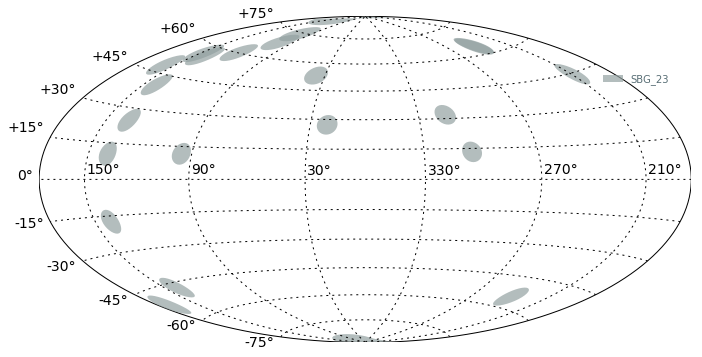

In [9]:
from fancy.detector.auger2014 import auger_location,theta_m,A,alpha_T,M, Merr,kappa_c

# Define a source catalogue and detector exposure
# In the paper we use the SBG catalogue
data = Data()
data.add_source(source_file, 'SBG_23')
data.add_detector(auger_location, theta_m, A, alpha_T, kappa_c, 'PAO')

# Plot the sources in Galactic coordinates
data.show();

In [14]:
stan_path = '../../../stan/'

# Define a Stan simulation to run
sim_name = stan_path + 'joint_model_sim.stan' # simulate all processes

# Choose a model to fit
model_name = stan_path + 'arrival_direction_only.stan'
#model_name = stan_path + 'joint_model.stan'

# Define Model object and compile Stan code if necessary
model = Model(model_name, sim_name)
model.compile()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5e68606443ad44786ec24b9c9457edc9 NOW.


ValueError: Failed to parse Stan model 'anon_model_a7350eb2673d8c2263729a3244a535ed'. Error message:
could not find include file: #include joint_model_functions.stan
